### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [30]:
data = pd.read_csv('data/coupons.csv')

In [21]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


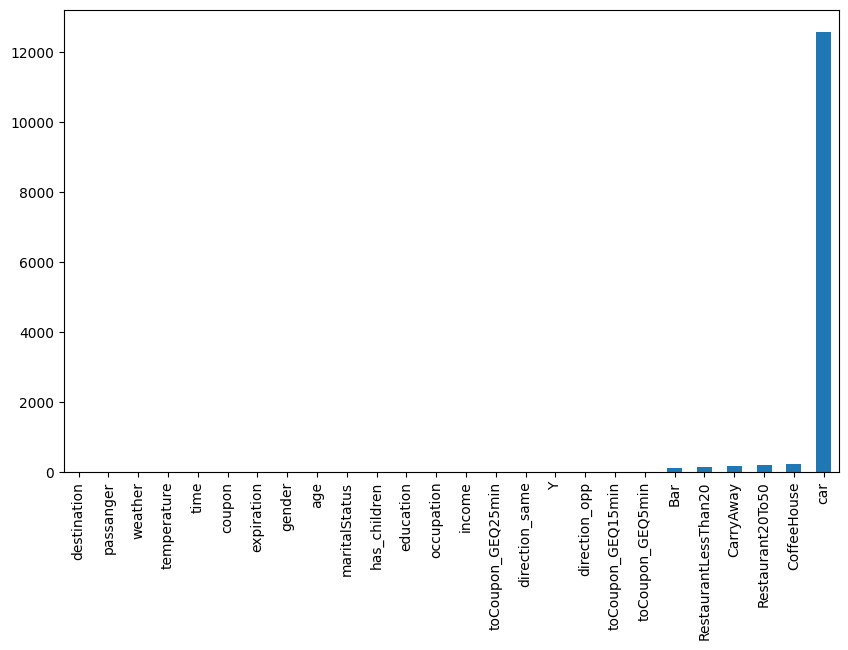

In [38]:
#missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

# plot missing values
plt.figure(figsize=(10,6))
data.isnull().sum().sort_values().plot(kind = 'bar')
plt.savefig('images/missing_plot_.png')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [78]:
#filling missing values with appropriate values
m_data=data.fillna({'car': 'no car info', 'Bar': '0', 'CoffeeHouse': '0', 'CarryAway': '0~0', 'RestaurantLessThan20': '0~0', 'Restaurant20To50': '0~0'}, inplace=False)

missing_values = m_data.isnull().sum()
print(missing_values)


#direction_opp and direction_same are redundant columns to represent inverse of each other. We can drop one of them. 
m_data=m_data.drop(columns=['direction_opp'], inplace=False)
m_data.info()


#car has weird values in it like  Car that is too old..... We safely ignore for now. 


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2

4. What proportion of the total observations chose to accept the coupon?



In [39]:
#what proportion of people used the coupon
used_coupon = m_data['Y'].value_counts(normalize=True)  #normalize=True gives proportions
print(used_coupon)  

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

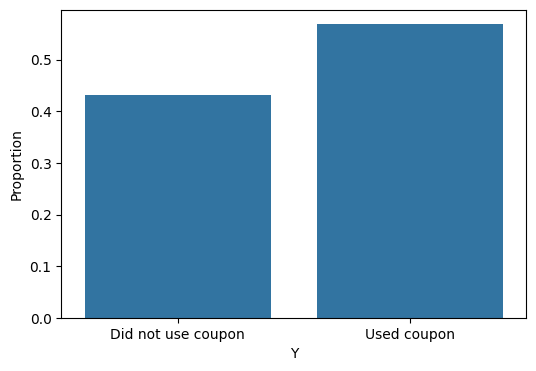

In [41]:
#use a bar plot to visualize the proportion of people who used the coupon
plt.figure(figsize=(6,4))
sns.barplot(x=used_coupon.index, y=used_coupon.values)
plt.xticks(ticks=[0,1], labels=['Did not use coupon', 'Used coupon'])
plt.ylabel('Proportion')
plt.savefig('images/column_proportion.png')    

6. Use a histogram to visualize the temperature column.

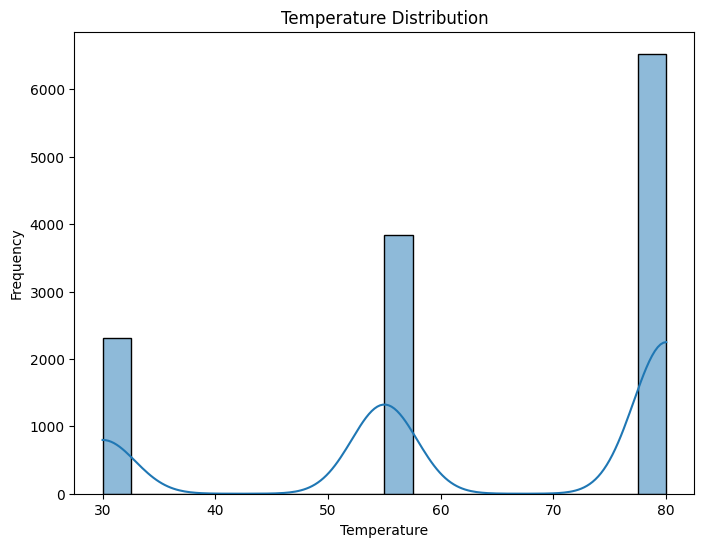

In [42]:
#use a histogram to visualize the temperature distribution
plt.figure(figsize=(8,6))
sns.histplot(m_data['temperature'], bins=20, kde=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.savefig('images/temperature_distribution.png')  

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [44]:
#create a new DataFrame that contains just the bar coupons
bar_data = m_data[m_data['coupon'] == 'Bar']
print(bar_data.tail(5))

           destination  passanger weather  temperature  time coupon  \
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration gender age maritalStatus  ...    Bar CoffeeHouse CarryAway  \
12663         1d   Male  26        Single  ...  never       never       1~3   
12664         2h   Male  26        Single  ...  never       never       1~3   
12667         1d   Male  26        Single  ...  never       never       1~3   
12670         2h   Male  26        Single  ...  never       never       1~3   
12682         1d   Male  26        Single  ...  never       never       1~3   

      RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
12663                  4~8        

2. What proportion of bar coupons were accepted?


Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64


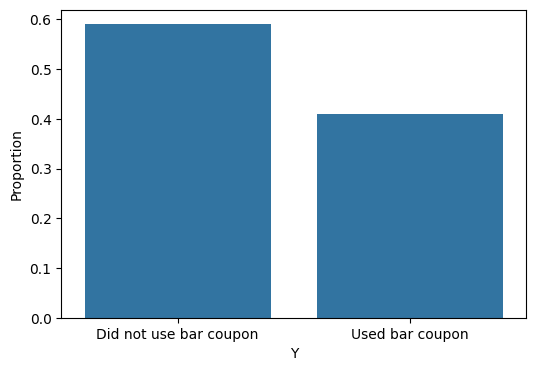

In [45]:
#what proportion of people used the bar coupon
used_bar_coupon = bar_data['Y'].value_counts(normalize=True)
print(used_bar_coupon)
#use a bar plot to visualize the proportion of people who used the bar coupon
plt.figure(figsize=(6,4))
sns.barplot(x=used_bar_coupon.index, y=used_bar_coupon.values)
plt.xticks(ticks=[0,1], labels=['Did not use bar coupon', 'Used bar coupon'])
plt.ylabel('Proportion')
plt.savefig('images/bar_coupon_proportion.png')


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Y                         0         1
Bar_group                            
3 or fewer times   0.629263  0.370737
more than 3 times  0.231156  0.768844


C:\Users\prove\AppData\Local\Temp\ipykernel_13296\337008021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['Bar'] = bar_data['Bar'].replace({'never': 0, 'less1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 10})
C:\Users\prove\AppData\Local\Temp\ipykernel_13296\337008021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['Bar'] = pd.to_numeric(bar_data['Bar'], errors='coerce')
C:\Users\prove\AppData\Local\Temp\ipykernel_13296\337008021.py:4: SettingWithCopyWarning: 
A value is trying to be set on

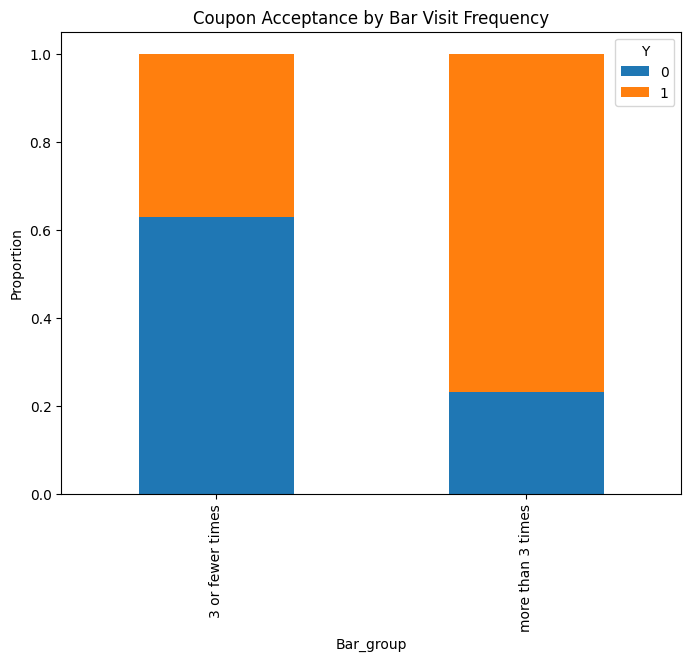

In [46]:
#compare the acceptance rate between those who went to a bar 3 or fewer times and those who went more than 3 times
bar_data['Bar'] = bar_data['Bar'].replace({'never': 0, 'less1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 10})
bar_data['Bar'] = pd.to_numeric(bar_data['Bar'], errors='coerce')
bar_data['Bar_group'] = np.where(bar_data['Bar'] <= 3, '3 or fewer times', 'more than 3 times')
bar_grouped = bar_data.groupby('Bar_group')['Y'].value_counts(normalize=True).unstack()
print(bar_grouped)
bar_grouped.plot(kind='bar', stacked=True, figsize=(8,6))
plt.ylabel('Proportion')
plt.title('Coupon Acceptance by Bar Visit Frequency')
plt.savefig('images/bar_visit_frequency.png')


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Y
0    0.151261
1    0.490931
dtype: float64


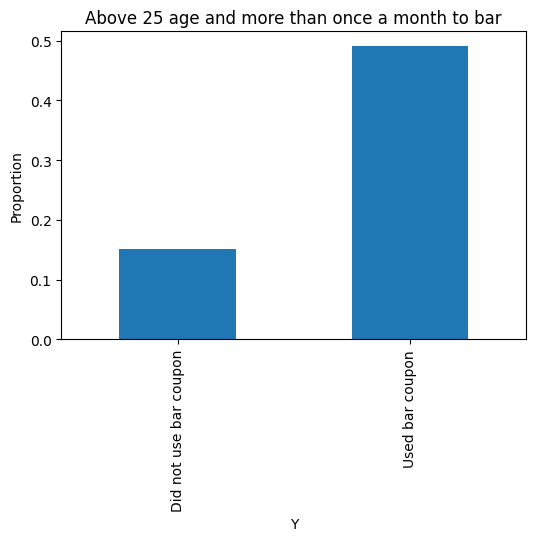

In [72]:
#compare the acceptance rate between drivers who go to a bar more than once a month and  are over the age of 25 to the all others. is tehre a difference?

filtered_data = bar_data[(bar_data['Bar'] > 1) & (bar_data['age'] != 'below21') & (bar_data['age'] != '21-25')]
filtered_grouped = filtered_data.groupby('Y').size() / bar_data.groupby('Y').size()
print(filtered_grouped)

#visualize the comparison
filtered_grouped.plot(kind='bar', figsize=(6,4))
plt.xticks(ticks=[0,1], labels=['Did not use bar coupon', 'Used bar coupon'])
plt.ylabel('Proportion')
plt.title('Above 25 age and more than once a month to bar')
plt.savefig('images/filtered_bar_coupon_proportion_above25.png')






5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Y
0    0.132773
1    0.475212
dtype: float64


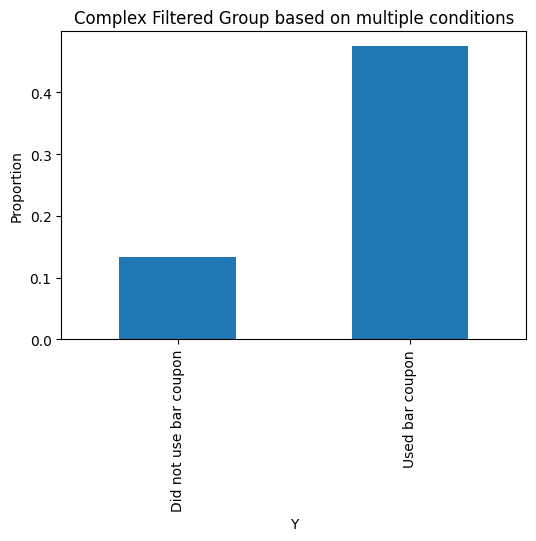

In [ ]:
# compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
complex_filtered_data = bar_data[(bar_data['Bar'] > 1) & (bar_data['passanger'] != 'Kid(s)') & (bar_data['occupation'] !='Farming Fishing & Forestry')]
complex_filtered_grouped = complex_filtered_data.groupby('Y').size() / bar_data.groupby('Y').size()
print(complex_filtered_grouped) 
#visualize the comparison
complex_filtered_grouped.plot(kind='bar', figsize=(6,4))
plt.xticks(ticks=[0,1], labels=['Did not use bar coupon', 'Used bar coupon'])
plt.ylabel('Proportion')
plt.title('Complex Filtered Group based on multiple conditions')
plt.savefig('images/complex_filtered_bar_coupon_proportion.png')

# When we did Farming Fishing & Forestry, we got nan values. It appears data need to be revisited. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Y
0    0.267227
1    0.548972
dtype: float64


C:\Users\prove\AppData\Local\Temp\ipykernel_13296\2686086298.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  condition3 = (bar_data['RestaurantLessThan20'].replace({'never': 0, '0~0': 0, 'less1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 10}).astype(float) > 4) & (bar_data['income'].replace({'Less than $12500': 12500, '$12500 - $24999': 24999, '$25000 - $37499': 37499, '$37500 - $49999': 49999, '$50000 - $62499': 62499, '$62500 - $74999': 74999, '$75000 - $87499': 87499, '$87500 - $99999': 99999, '$100000 or More': 100000}).astype(float) < 50000)
C:\Users\prove\AppData\Local\Temp\ipykernel_13296\2686086298.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resul

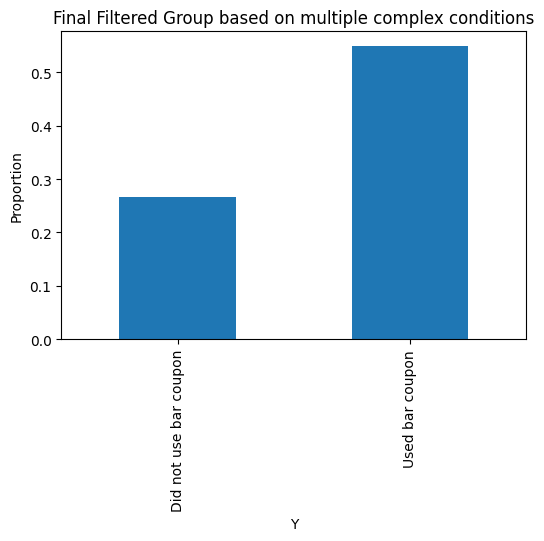

In [73]:
#Compare the acceptance rates between those drivers who:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
# go to bars more than once a month and are under the age of 30 *OR*
# go to cheap restaurants more than 4 times a month and income is less than 50K.
condition1 = (bar_data['Bar'] > 1) & (bar_data['passanger'] != 'Kid(s)') & (bar_data['maritalStatus'] != 'Widowed')
condition2 = (bar_data['Bar'] > 1) & (bar_data['age'].isin(['below21', '21-25', '26-30']))
condition3 = (bar_data['RestaurantLessThan20'].replace({'never': 0, '0~0': 0, 'less1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 10}).astype(float) > 4) & (bar_data['income'].replace({'Less than $12500': 12500, '$12500 - $24999': 24999, '$25000 - $37499': 37499, '$37500 - $49999': 49999, '$50000 - $62499': 62499, '$62500 - $74999': 74999, '$75000 - $87499': 87499, '$87500 - $99999': 99999, '$100000 or More': 100000}).astype(float) < 50000)
combined_condition = condition1 | condition2 | condition3
final_filtered_data = bar_data[combined_condition]
final_filtered_grouped = final_filtered_data.groupby('Y').size() / bar_data.groupby('Y').size()
print(final_filtered_grouped)

#visualize the comparison
final_filtered_grouped.plot(kind='bar', figsize=(6,4))
plt.xticks(ticks=[0,1], labels=['Did not use bar coupon', 'Used bar coupon'])
plt.ylabel('Proportion')
plt.title('Final Filtered Group based on multiple complex conditions')
plt.savefig('images/final_filtered_bar_coupon_proportion.png')





7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
The hypothesis proposes a targeted marketing strategy focusing on a specific segment: drivers who are high-frequency bar visitors (>3 times/month), are over 25 years old (Age>25), and are urban adults (excluding "Farming, Fishing, Forestry").

Dive deep details to refer:
Driver Segment	Coupon Acceptance Rate
Overall Average	41%
Drivers visiting >3 times/month	76%
Drivers visiting ≤3 times/month	37%
Age>25 AND >1 time/month visitor	49%
NOT "kids" AND NOT "Farming, Fishing, Forestry"	47%
>4 times/month visitor AND Age<30	54%


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [86]:
#identify other coupon types that might show similar patterns and perform similar analyses on them.#For example, we can analyze the "CoffeeHouse" coupon type in a similar manner to how we analyzed the "Bar" coupon type.
coffee_data = m_data[m_data['coupon'] == 'Coffee House']
print(coffee_data.tail(5))


      destination passanger weather  temperature  time        coupon  \
12656        Home     Alone   Snowy           30  10PM  Coffee House   
12659        Work     Alone   Snowy           30   7AM  Coffee House   
12674        Home     Alone   Rainy           55  10PM  Coffee House   
12675        Home     Alone   Snowy           30  10PM  Coffee House   
12681        Work     Alone   Snowy           30   7AM  Coffee House   

      expiration gender age    maritalStatus  ...    Bar CoffeeHouse  \
12656         2h   Male  31  Married partner  ...  less1       never   
12659         1d   Male  31  Married partner  ...  less1       never   
12674         2h   Male  26           Single  ...  never       never   
12675         2h   Male  26           Single  ...  never       never   
12681         1d   Male  26           Single  ...  never       never   

      CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
12656       4~8                  gt8            less1       

Y
0    0.500751
1    0.499249
Name: proportion, dtype: float64


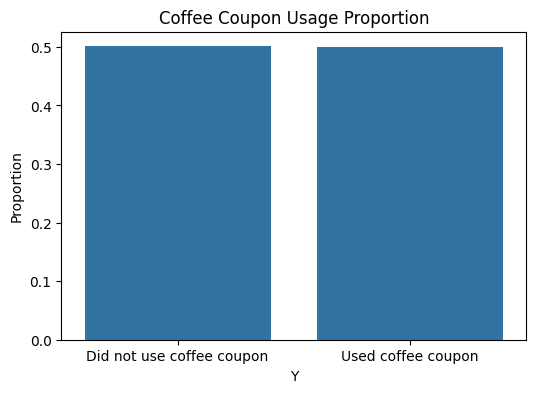

In [90]:
# who will use the coffee coupon?
c = coffee_data['Y'].value_counts(normalize=True)
print(coffee_used_coupon) 

#visualize the proportion of people who used the coffee coupon
plt.figure(figsize=(6,4))
sns.barplot(x=coffee_used_coupon.index, y=coffee_used_coupon.values)


plt.xticks(ticks=[0,1], labels=['Did not use coffee coupon', 'Used coffee coupon'])
plt.ylabel('Proportion')
plt.title('Coffee Coupon Usage Proportion') 
plt.savefig('images/coffee_coupon_proportion.png')




      destination passanger weather  temperature  time        coupon  \
12559        Home     Alone   Snowy           30  10PM  Coffee House   
12565        Work     Alone   Snowy           30   7AM  Coffee House   
12655        Home     Alone   Rainy           55  10PM  Coffee House   
12656        Home     Alone   Snowy           30  10PM  Coffee House   
12659        Work     Alone   Snowy           30   7AM  Coffee House   

      expiration  gender age    maritalStatus  ...    Bar CoffeeHouse  \
12559         2h  Female  26  Married partner  ...  never       less1   
12565         1d  Female  26  Married partner  ...  never       less1   
12655         2h    Male  31  Married partner  ...  less1       never   
12656         2h    Male  31  Married partner  ...  less1       never   
12659         1d    Male  31  Married partner  ...  less1       never   

      CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
12559       1~3                  1~3            never 

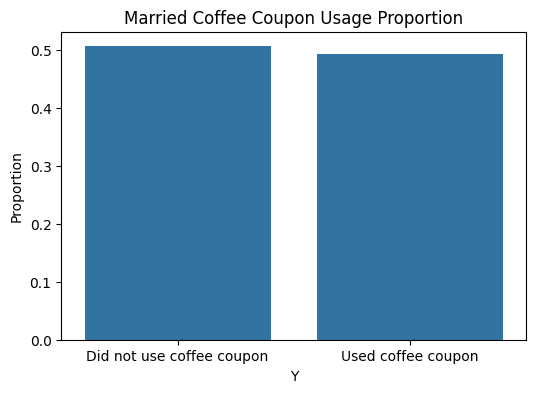

In [ ]:
#find married people used the coffee coupon
married_coffee_data = coffee_data[coffee_data['maritalStatus'] == 'Married partner']
print(married_coffee_data.tail(5))

#proportion of married people who used the coffee coupon
married_coffee_used_coupon = married_coffee_data['Y'].value_counts(normalize=True)
print(married_coffee_used_coupon)

#visualize the proportion of married people who used the coffee coupon
plt.figure(figsize=(6,4))
sns.barplot(x=married_coffee_used_coupon.index, y=married_coffee_used_coupon.values)
plt.xticks(ticks=[0,1], labels=['Did not use coffee coupon', 'Used coffee coupon'])
plt.ylabel('Proportion')
plt.title('Married Coffee Coupon Usage Proportion')
plt.savefig('images/married_coffee_coupon_proportion.png')

# 50 % hit rate for married people using coffee coupon.
